<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이 학습

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras import Input, models, layers, optimizers, metrics
from keras.layers import Dense, Flatten
from keras.applications import VGG16

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 데이터셋 준비

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Study/Everyone's DeepLearning/run_project/train",
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 160 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

test_generator = test_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Study/Everyone's DeepLearning/run_project/test",
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 120 images belonging to 2 classes.


## 모델 생성

In [8]:
transfer_model = VGG16(weights='imagenet', include_top=False,
                       input_shape=(150, 150, 3))
transfer_model.trainable = False

transfer_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [9]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))

finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
# 모델 컴파일
finetune_model.compile(loss='sparse_categorical_crossentropy',
                       optimizer=optimizers.Adam(learning_rate=0.0002),
                       metrics=['accuracy'])

In [15]:
# 모델 학습
history = finetune_model.fit(train_generator,
                             steps_per_epoch=160//5,
                             epochs=20,
                             validation_data=test_generator,
                             validation_steps=120//5)

Epoch 1/20
32/32 [==============================] - 48s 2s/step - loss: 0.3777 - accuracy: 0.8438 - val_loss: 0.3373 - val_accuracy: 0.8583
Epoch 2/20
32/32 [==============================] - 3s 87ms/step - loss: 0.2577 - accuracy: 0.9625 - val_loss: 0.2699 - val_accuracy: 0.9333
Epoch 3/20
32/32 [==============================] - 3s 95ms/step - loss: 0.2660 - accuracy: 0.9062 - val_loss: 0.2537 - val_accuracy: 0.9417
Epoch 4/20
32/32 [==============================] - 3s 85ms/step - loss: 0.2292 - accuracy: 0.9438 - val_loss: 0.3039 - val_accuracy: 0.8500
Epoch 5/20
32/32 [==============================] - 2s 76ms/step - loss: 0.1808 - accuracy: 0.9563 - val_loss: 0.2230 - val_accuracy: 0.9167
Epoch 6/20
32/32 [==============================] - 2s 71ms/step - loss: 0.1612 - accuracy: 0.9688 - val_loss: 0.1886 - val_accuracy: 0.9333
Epoch 7/20
32/32 [==============================] - 3s 79ms/step - loss: 0.1706 - accuracy: 0.9438 - val_loss: 0.1758 - val_accuracy: 0.9417
Epoch 8/20
32/

## 결과 그래프

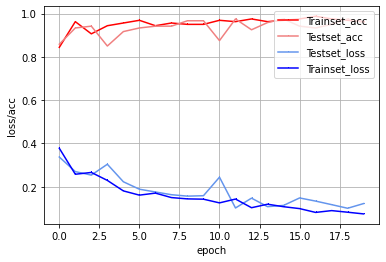

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, acc, marker=',', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker=',', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker=',', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()